In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#load the CTC dataset

In [86]:
# Load the dataset
df = pd.read_csv('/content/CTC_ DataSet.csv',index_col = 0)
df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [87]:
#shape of dataset
df.shape

(1338, 8)

#EDA(Explotary Data Analysis)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   Previous CTC          1338 non-null   object
 4   Previous job changes  1338 non-null   int64 
 5   Graduation marks      1338 non-null   int64 
 6   Exp (Months)          1338 non-null   int64 
 7   CTC                   1338 non-null   object
dtypes: int64(3), object(5)
memory usage: 94.1+ KB


In [89]:
#check the null value in dataset
df.isnull().sum()

,0
College,0
Role,0
City type,0
Previous CTC,0
Previous job changes,0
Graduation marks,0
Exp (Months),0
CTC,0


In [90]:
#check the duplicated row in dataset
df.duplicated().sum()

0

In [91]:
#rename column name
df.columns = df.columns.str.replace(' ', '_')

convert the CTC column in integer

In [92]:
df['CTC']=df['CTC'].str.replace(',','').str.strip().astype(float).astype(int)
df['CTC']

,CTC
S.No.,
1,71406
2,68005
3,76764
4,82092
5,73878
...,...
1334,69712
1335,69298
1336,66397


In [93]:
#convert prevous ctc in integer and replace ,
df['Previous_CTC']=df['Previous_CTC'].str.replace(',','').str.strip().astype(float).astype(int)
df['Previous_CTC'].head()

,Previous_CTC
S.No.,
1,55523
2,57081
3,60347
4,49010
5,57879


In [94]:
df.describe()

,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_(Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75458.852018
std,6685.600553,1.123502,14.894696,14.049960,12551.282932
min,36990.000000,1.000000,35.000000,18.000000,53020.000000
25%,50547.000000,2.000000,47.000000,27.000000,66904.750000
50%,55293.500000,3.000000,60.000000,39.000000,73112.500000
75%,60150.500000,4.000000,73.000000,51.000000,80746.500000
max,77911.000000,4.000000,85.000000,64.000000,123416.000000


In [95]:
#copy ths dataset any possible data sloss
df1 = df.copy()

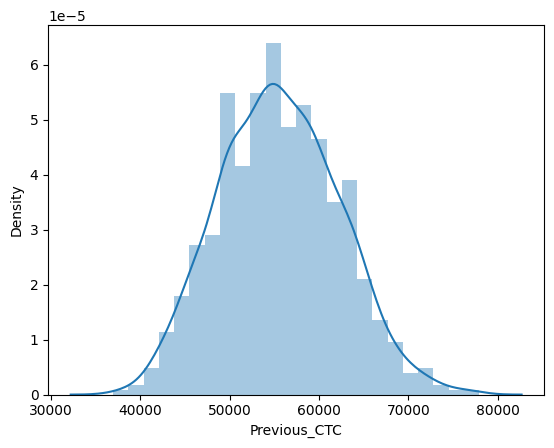

In [96]:
#Previous CTC distribution
sns.distplot(df['Previous_CTC'])
plt.show()

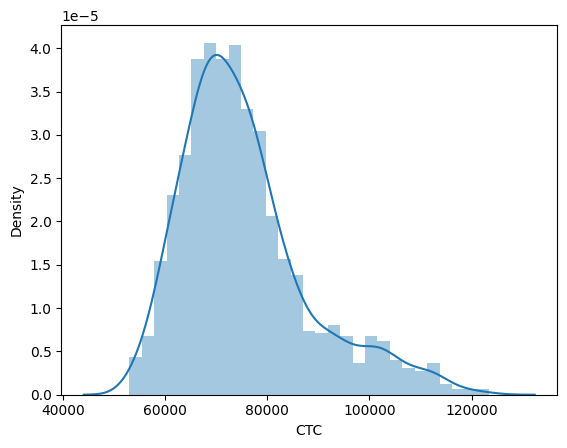

In [97]:
#ctc distribution
sns.distplot(df['CTC'])
plt.show()

#Remove outlier in CTC

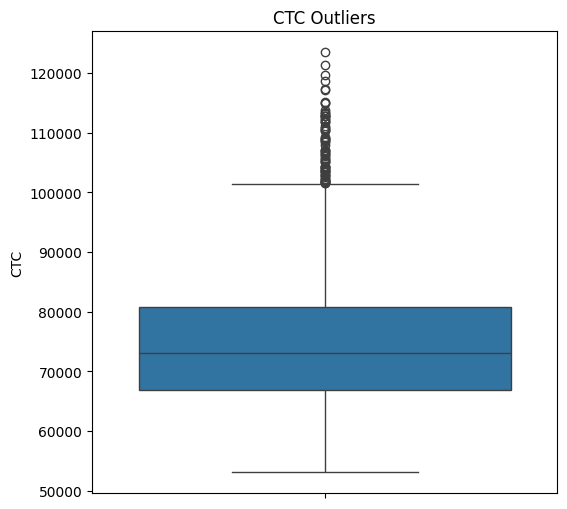

In [98]:
# Box plot for CTC outliers
plt.figure(figsize=(6,6))
sns.boxplot(y='CTC', data=df)
plt.title('CTC Outliers')
plt.show()

In [99]:
Q1 = df['CTC'].quantile(0.25)
Q3 = df['CTC'].quantile(0.75)
IQR = Q3 - Q1

In [100]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [101]:
df = df[(df['CTC'] >= lower_bound) & (df['CTC'] <= upper_bound)]

In [102]:
df.head()

,College,Role,City_type,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_(Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406
2,Tier 2,Executive,Metro,57081,1,84,18,68005
3,Tier 2,Executive,Metro,60347,2,52,28,76764
4,Tier 3,Executive,Metro,49010,2,81,33,82092
5,Tier 3,Executive,Metro,57879,4,74,32,73878


In [103]:
#before outlier shape of data
df1.shape

(1338, 8)

In [104]:
#after outerlier shape of data
df.shape

(1262, 8)

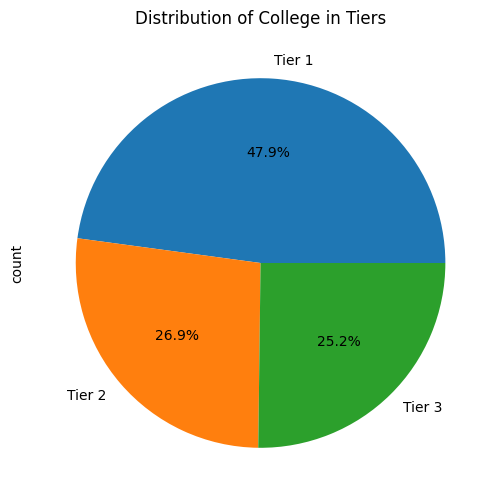

In [105]:
# Pie chart for College distribution
plt.figure(figsize=(8,6))
df['College'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of College in Tiers')
plt.show()

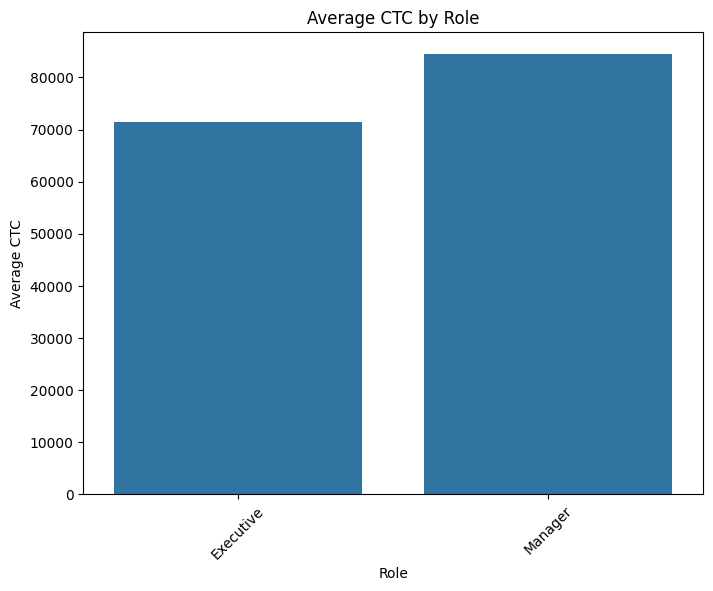

In [106]:
# Calculate the mean CTC for each Role
role_ctc_avg = df.groupby('Role')['CTC'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='Role', y='CTC', data=role_ctc_avg)
plt.title('Average CTC by Role')
plt.xlabel('Role')
plt.ylabel('Average CTC')
plt.xticks(rotation=45)
plt.show()

In [107]:
df['Role'].value_counts()

,count
Role,
Executive,1062
Manager,200


In [108]:
df['City_type'].value_counts()

,count
City_type,
Non-Metro,638
Metro,624


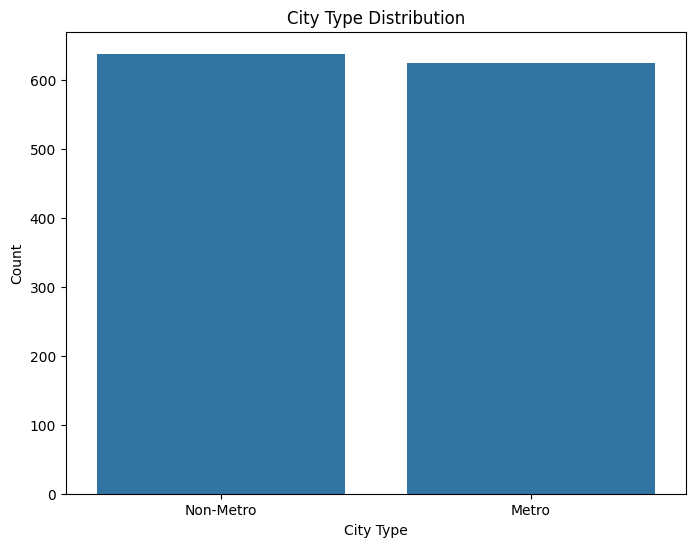

In [109]:
#bar chart on city_type bar chart
plt.figure(figsize=(8,6))
sns.countplot(x='City_type', data=df)
plt.title('City Type Distribution')
plt.xlabel('City Type')
plt.ylabel('Count')
plt.show()

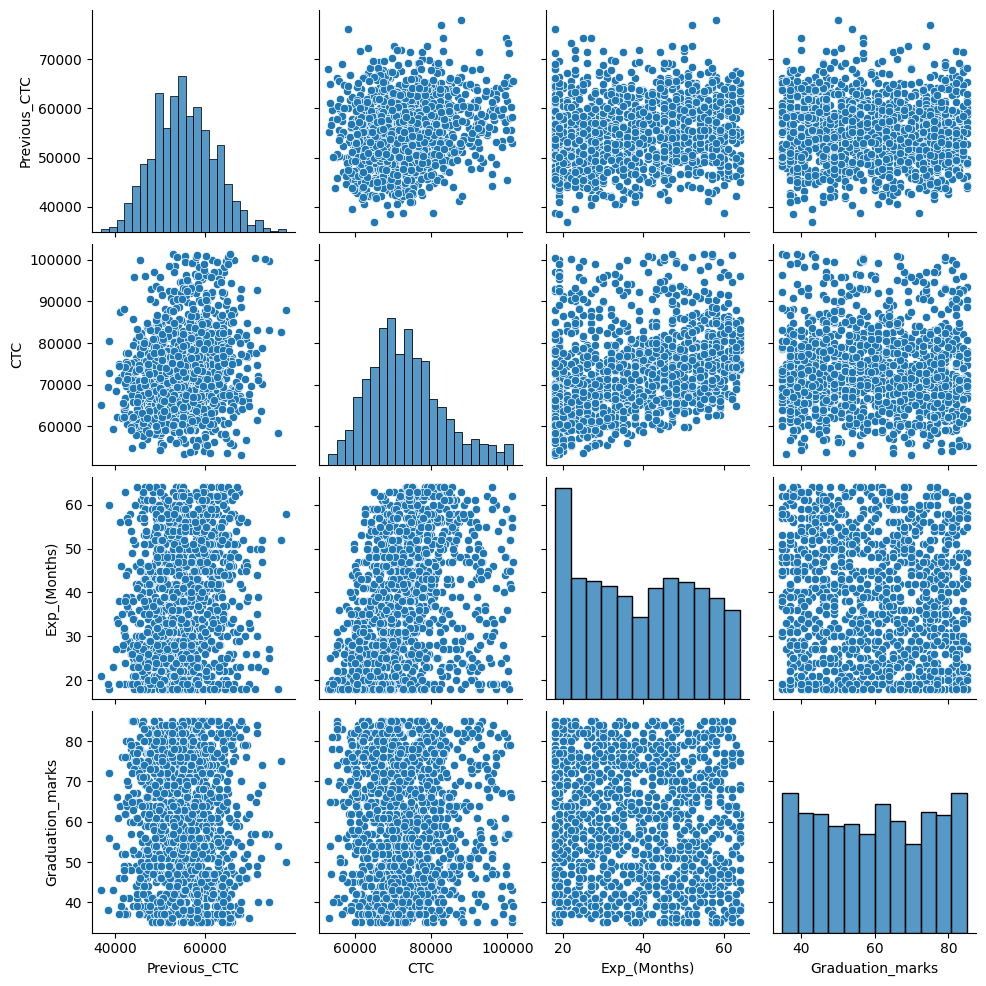

In [110]:
# Pair plot for numerical columns
sns.pairplot(df[['Previous_CTC', 'CTC', 'Exp_(Months)', 'Graduation_marks']])
plt.show()

#convert the categorical in numerical column

In [111]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
label_encoder = LabelEncoder()

In [112]:
# Apply label encoding to all categorical columns
df['College'] = label_encoder.fit_transform(df['College'])
df['Role'] = label_encoder.fit_transform(df['Role'])
df['City_type'] = label_encoder.fit_transform(df['City_type'])

In [113]:
df.head()

,College,Role,City_type,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_(Months),CTC
S.No.,,,,,,,,
1,0,1,1,55523,3,66,19,71406
2,1,0,0,57081,1,84,18,68005
3,1,0,0,60347,2,52,28,76764
4,2,0,0,49010,2,81,33,82092
5,2,0,0,57879,4,74,32,73878


#correlation

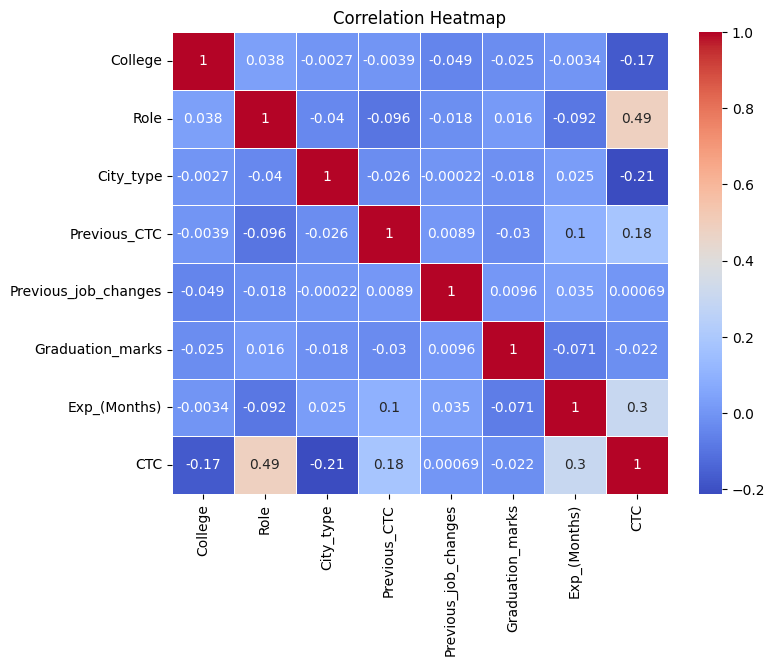

In [114]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [115]:
# X is all features except 'CTC', y is the 'CTC' (target)
X = df.drop(columns=['CTC'])
y = df['CTC']

#scaled the X column for better result

In [116]:
# Apply feature scaling
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

#spliting the datset in to train and test datset

In [117]:
#spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Apply model

In [118]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression (SVR)': SVR(),
    'Linear Regression': LinearRegression()

    }

In [119]:
# Train models and evaluate their performance
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    print(f"{model_name} - RMSE: {rmse}")

Logistic Regression - RMSE: 9664.396304418282
Random Forest - RMSE: 7026.827172215534
Support Vector Regression (SVR) - RMSE: 10107.434500985004
Linear Regression - RMSE: 7314.685851452632


Based on the Root Mean Squared Error (RMSE) values you provided for the models, it seems that the Random Forest Regression model performed the best, with the lowest RMSE of 7026

In [126]:
# Train the best model (random forest regression)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Random Forest Regression - RMSE: {rmse}")

Random Forest Regression - RMSE: 6981.588797691269


#compare my prediction CTC with the actual CTC

In [142]:
# Create a DataFrame for actual_CTCand predicted_CTC values
comparison_df = pd.DataFrame({
    'Actual CTC': y_test,
    'Predicted CTC': y_pred
})

In [143]:
print(comparison_df.head())

       Actual CTC  Predicted CTC
S.No.                           
1278        60200       63026.99
922         80531       81528.56
567         74082       66443.85
373         74170       74530.01
437         66756       71625.12


#For more accuracy Hyperparameter Tuning

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [133]:
# Define parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, 30, None],         # Depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Set up RandomizedSearchCV with 10 iterations
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10,
                                      cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Train the model with RandomizedSearch
random_search_rf.fit(X_train, y_train)

# Get the best estimator
best_rf = random_search_rf.best_estimator_

# Predict using the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Calculate RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest (Tuned with RandomizedSearchCV) - RMSE: {rmse_rf}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest (Tuned with RandomizedSearchCV) - RMSE: 6878.912638976607


#Compare prediction after hyper parameter tuning ,actual_ctc and Rf_prediction_ctc

In [148]:
# Create a DataFrame for actual_CTCand predicted_CTC values
comparison_df_rf = pd.DataFrame({
    'Actual CTC': y_test,
    'prediction rf CTC': y_pred,
    'Predicted rf hyperTun CTC': y_pred_rf
})

In [149]:
print(comparison_df_rf.head())

       Actual CTC  prediction rf CTC  Predicted rf hyperTun CTC
S.No.                                                          
1278        60200           63026.99               62988.303018
922         80531           81528.56               81517.318033
567         74082           66443.85               66250.142435
373         74170           74530.01               73770.022903
437         66756           71625.12               70693.625443


##Save the model

In [146]:
import joblib  # to save the model
# Save the trained model to a file
model_filename = "Random_forest_ctc_model.pkl"
joblib.dump(best_rf, model_filename)

print(f"Model saved as {model_filename}")

Model saved as Random_forest_ctc_model.pkl
